# Biodiversity Intactness Index change in Phoenix subdivision

Author: Rosemary Juarez

link to [github repo](https://github.com/rosemaryjuarez/Maricopa-County-bidiversity-analysis/tree/main)

### background

I will be covering Biodiversity Intactness Index change within Maricopa County, which encompasses the Phoenix metropolitan area. In 2021, Maricopa county was the US county that added the most developed land since 2001. Urban sprawl creates pressure on biodiversity and natural areas. I will explore a dataset showing values for a biodiversity intactness index (BII) to find changes in this BII around the Phoenix area from 2017 to 2020. 


1. Dataset Description

### - a: BII data:
part of the MPC STAC catalog. I access the ‘io-biodiversity’ collection and look for the 2017 and 2020 rasters covering Phoenix subdivision. using the following coordinates for a bounding box, it will allow me to clip my raster data to be within the arizona bounds: 
[-112.826843, 32.974108, -111.184387, 33.863574]
### - b: Phoenix subdivision: 
Phoenix subdivision polygon in the Census County Subdivision shapefiles for Arizona: [data link](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions)


## Analysis highlights:
- Fetch raster data from an API(Microsoft Planetary)
- Vizualize raster data
- calculating percentage change in raster data
- rasterize
- vizualize both vector and raster in one plot

In [2]:
#calling in all the packages i might need

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import xarray as xr
import rioxarray as rioxr
from shapely.geometry import box

from rasterio.features import rasterize # for rasterizing polygons
from rasterio.features import shapes
import pystac_client
import planetary_computer
import matplotlib.patches as mpatches # for creating legends

# used to access STAC catalogs
from pystac_client import Client
# used to sign items from the MPC STAC catalog
import planetary_computer

from shapely.geometry import Polygon

# ----- other libraries for nice ouputs
from IPython.display import Image

from geogif import gif  # to create gifb


# Importing Data

### Arizona:


In [23]:
#first going to call in arizona shapefile
ar = gpd.read_file('data/tl_2022_04_cousub.shp')
ar.head()

,STATEFP,COUNTYFP,COUSUBFP,COUSUBNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CNECTAFP,NECTAFP,NCTADVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,04,005,91198,01934931,0400591198,Flagstaff,Flagstaff CCD,22,Z5,G4040,NaN,NaN,NaN,S,12231052883,44653332,+35.1066114,-111.3662497,"POLYGON ((-112.13370 35.85596, -112.13368 35.8..."
1,04,005,91838,01934953,0400591838,Kaibab Plateau,Kaibab Plateau CCD,22,Z5,G4040,NaN,NaN,NaN,S,7228864534,29327221,+36.5991097,-112.1368033,"POLYGON ((-112.66039 36.53941, -112.66033 36.5..."
2,04,005,91683,01934950,0400591683,Hualapai,Hualapai CCD,22,Z5,G4040,NaN,NaN,NaN,S,2342313339,3772690,+35.9271665,-113.1170408,"POLYGON ((-113.35416 36.04097, -113.35416 36.0..."
3,04,023,92295,01934961,0402392295,Nogales,Nogales CCD,22,Z5,G4040,NaN,NaN,NaN,S,1762322938,2382710,+31.4956020,-111.0171332,"POLYGON ((-111.36692 31.52136, -111.36316 31.5..."
4,04,023,92550,01934966,0402392550,Patagonia,Patagonia CCD,22,Z5,G4040,NaN,NaN,NaN,S,1439530300,685527,+31.5664619,-110.6410279,"POLYGON ((-110.96273 31.68695, -110.96251 31.6..."


In [24]:
#now justchanging crs to make sure it looks good on epsg 4326
ar = ar.to_crs(4326)

<Axes: >

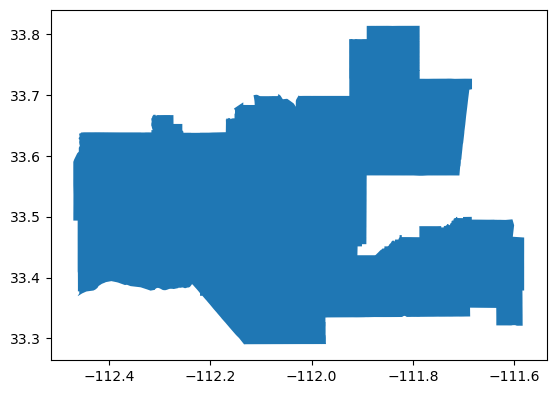

In [25]:
#plotting
phoenix = ar[ar.NAME == 'Phoenix']
phoenix.plot()

In [8]:
#calling in API
catalog = pystac_client.Client.open(
    'https://planetarycomputer.microsoft.com/api/stac/v1',
    modifier=planetary_computer.sign_inplace,)

#find the collection
bio_collection = catalog.get_child('io-biodiversity')

# bounding box for search we are interessted with

bbox = [-112.826843, 32.974108, -111.184387, 33.863574]

# catalog search
search = catalog.search(
    collections = ['io-biodiversity'],
    bbox = bbox)

In [16]:
#searching how many items are in the  collection
items = search.item_collection()
len(items) #there are 4 items!
items

id: bii_2020_34.74464974521749_-115.38597824385106_cog
"bbox: [-115.3859782, 27.565314, -108.2066425, 34.7446497]"
datetime: None
proj:epsg: 4326
"proj:shape: [7992, 7992]"
end_datetime: 2020-12-31T23:59:59Z
"proj:transform: [0.0008983152841195215, 0.0, -115.38597824385106, 0.0, -0.0008983152841195215, 34.74464974521749, 0.0, 0.0, 1.0]"
start_datetime: 2020-01-01T00:00:00Z
https://stac-extensions.github.io/projection/v1.0.0/schema.json
https://stac-extensions.github.io/raster/v1.1.0/schema.json
https://stac-extensions.github.io/version/v1.1.0/schema.json


### importing for 2017

In [26]:
# get third item in the catalog search as that is for the year 2017
item_17 = items[3]

#figure out the key
for key in item_17.assets.keys():
    print(key, '--', item_17.assets[key].title)

#going to extract now the raster for 2017
az_17 = rioxr.open_rasterio(item_17.assets['data'].href)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


### for year 2020

In [27]:
#and for the year 2020, we want to pull that out
item_20 = items[0]
type(item_20)

#figure out the key
for key in item_20.assets.keys():
    print(key, '--', item_20.assets[key].title)
    
#also extracting for the year 2020
az_20 = rioxr.open_rasterio(item_20.assets['data'].href)

data -- Biodiversity Intactness
tilejson -- TileJSON with default rendering
rendered_preview -- Rendered preview


## data wrangling our raster data

In [28]:
# Since there is only one band, we want to squeeze and remove both for 2017 and 2020, since it will just be in the way

# remove length 1 dimension (band)
az_17 = az_17.squeeze().drop('band')

az_20 = az_20.squeeze().drop('band')


In [29]:
# But i have to remember that I want this clipped, so that the raster will show up quicker
az_17 = az_17.rio.clip_box(*phoenix.total_bounds)

az_20 = az_20.rio.clip_box(*phoenix.total_bounds)

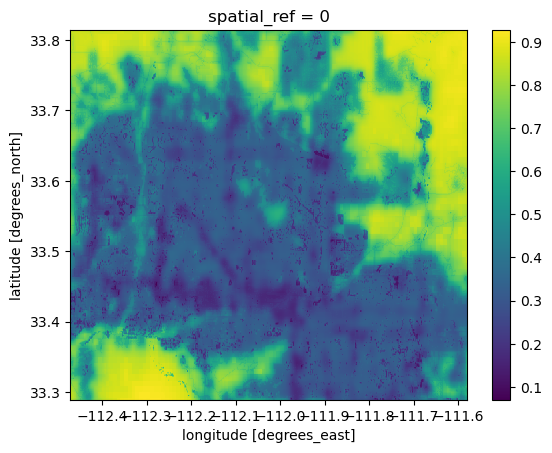

In [30]:
az_17.plot()

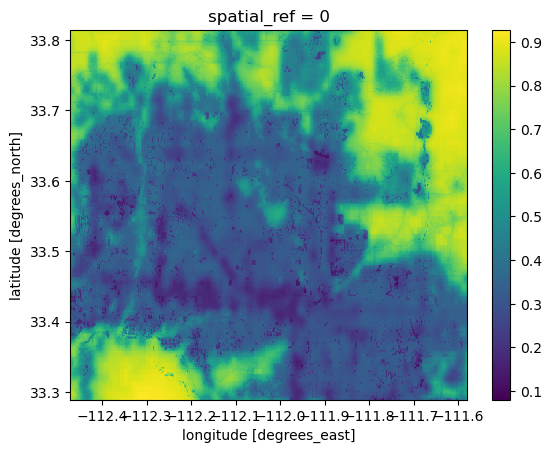

In [31]:
az_20.plot()

# Question 2: Geographical context of Phoenix subdivision

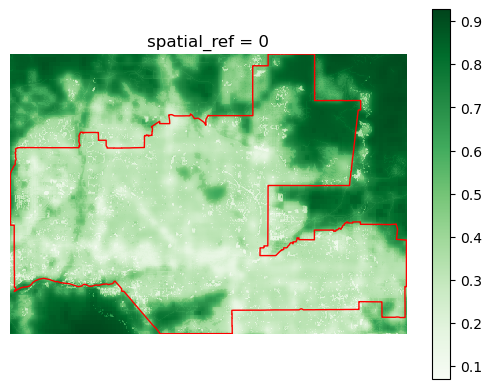

In [35]:
#now I want to make a map of Arizona in geographical context
fig, ax = plt.subplots()

az_17.plot(ax = ax,
                cmap = 'Greens'
               )
phoenix.plot(ax = ax,
             color = 'none',
             edgecolor = 'red'
            )
plt.axis('off')
plt.show()

# Question 3: map of Phoenix

In [36]:
#make a mask first
import xarray as xr
import rioxarray as rioxr

# create raster mask based on  polygon
phoenix_mask = rasterize(shapes = [phoenix.loc[10, 'geometry']],  # a list of geometries
                        out_shape = az_20.shape,           # shape of outout np array (shape of raster)
                        transform = az_20.rio.transform(), # transformation of raster ## change CRS and drop and squeeze# original dimensions and coordinates
                        all_touched = True)

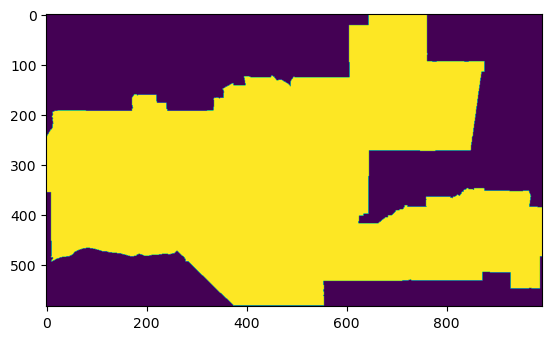

In [37]:
#view that my mask worked out
plt.imshow(phoenix_mask)

In [45]:
#going to apply my mask to my raster now
phoenix_bii_20 = az_20 * phoenix_mask
phoenix_bii_17 = az_17 * phoenix_mask

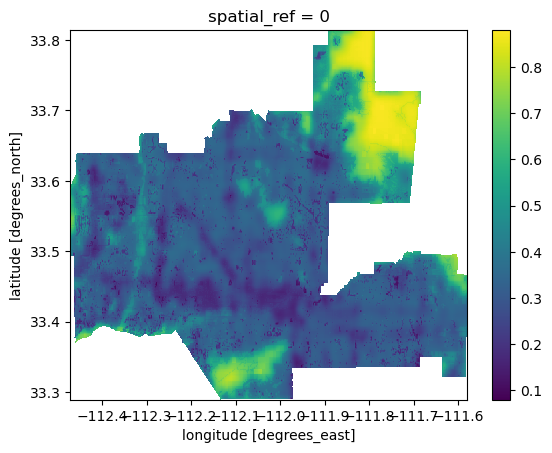

In [46]:
#Just going to remove the noise outside the raster data that i dont want
phoenix_bii_20 = phoenix_bii_20.where(phoenix_bii_20 != 0)
phoenix_bii_20.plot()

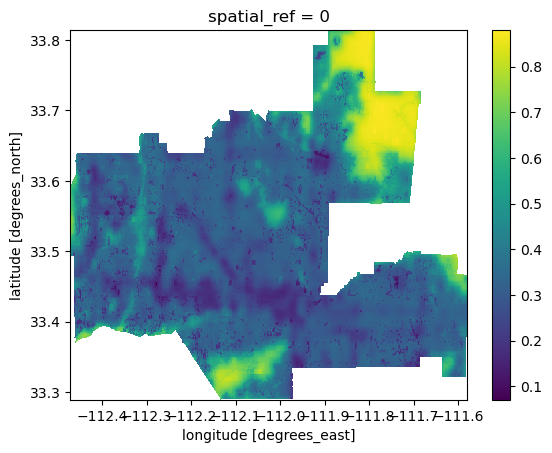

In [47]:
#same process with 2017
phoenix_bii_17 = phoenix_bii_17.where(phoenix_bii_17 != 0)
phoenix_bii_17.plot()

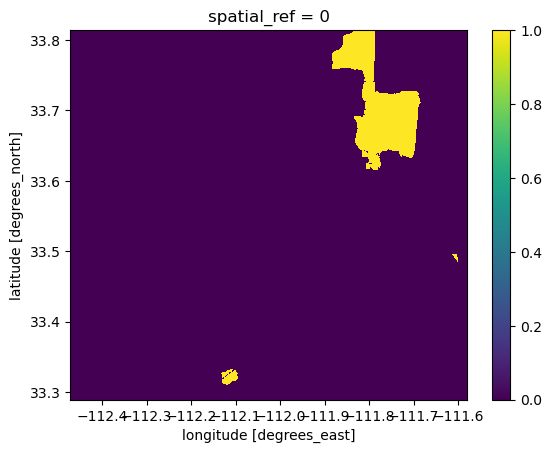

In [49]:
#now calculating where the BII is above 75 for 2020
phoenix_bii_2020=phoenix_bii_20 >= .75
phoenix_bii_2020.plot()

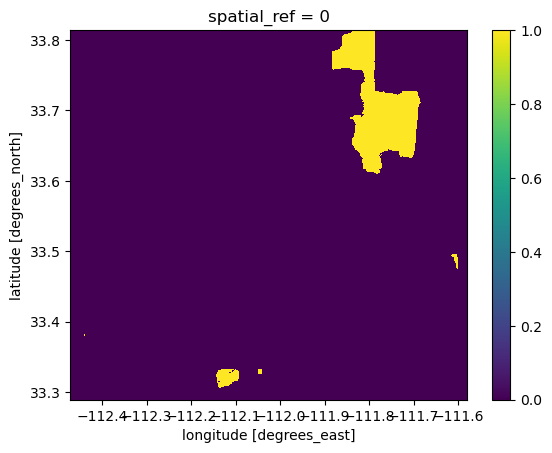

In [48]:
#same for 2017
phoenix_bii_2017=phoenix_bii_17 >= .75
phoenix_bii_2017.plot()

In [50]:
#percentage area for 2020 and 2017: first need to convert boolean to int
phoenix_bii_2020 = phoenix_bii_2020.astype('int64')
phoenix_bii_2017 = phoenix_bii_2017.astype('int64')

In [54]:
#now finding the percentage here
#(pixels in class)/(total pixels) * 100
Phoenix_bii_2020_per = (phoenix_bii_2020.sum().item()/phoenix_mask.sum().item()) * 100
Phoenix_bii_2017_per = (phoenix_bii_2017.sum().item()/phoenix_mask.sum().item()) * 100
print(f'{Phoenix_bii_2017_per:.2f}, is the calculated BII percentage above .75')
print(f'{Phoenix_bii_2020_per:.2f}, is the calculated BII percentage above .75')

7.12, is the calculated BII percentage above .75
6.48, is the calculated BII percentage above .75


In [56]:
#subtracting to find the difference
print(f'{Phoenix_bii_2020_per - Phoenix_bii_2017_per:.2f}, is the calculated BII percentage above .75')

-0.63, is the calculated BII percentage above .75


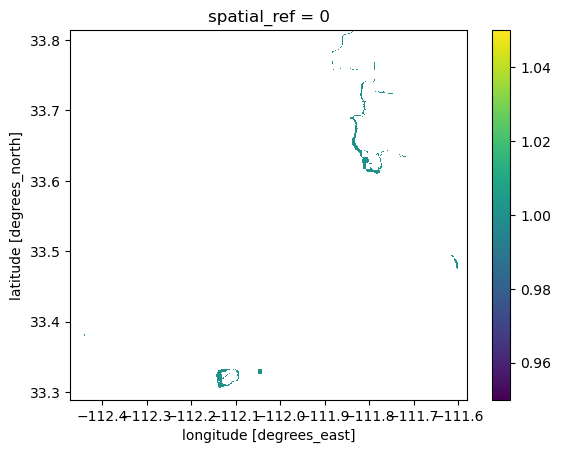

In [57]:
phoenix_bii_change = phoenix_bii_2017 - phoenix_bii_2020
phoenix_bii_diff = phoenix_bii_change.where(phoenix_bii_change == 1)
phoenix_bii_diff.plot()

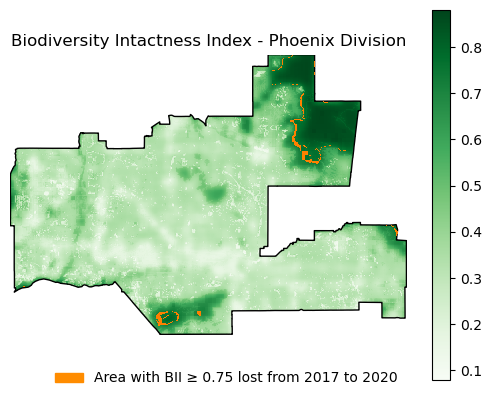

In [58]:
#final final map
fig, ax = plt.subplots()

phoenix_bii_20.plot(ax = ax,
                    cmap = 'Greens'    
                )
phoenix.plot(ax = ax,
             color = 'none',
             edgecolor = 'black'
            )
phoenix_bii_diff.plot(ax = ax,
                        cmap = 'autumn',
                        add_colorbar = False
                       )
red_patch = mpatches.Patch(color='darkorange',
                           label='Area with BII ≥ 0.75 lost from 2017 to 2020')
plt.axis('off')
ax.legend(handles=[red_patch], frameon=False, loc = (0.10, -0.20))
plt.title('Biodiversity Intactness Index - Phoenix Division')
plt.show()


## Citations:
Source, Microsoft Open, et al. Microsoft/PlanetaryComputer, Zenodo, [https://doi.org10.5281/zenodo.7261897](https://doi.org10.5281/zenodo.7261897). Accessed 13 December 2023.

U.S. Census Bureau. "Arizona County Subdivision" Census Tiger/line, [https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions](https://www.census.gov/cgi-bin/geo/shapefiles/index.php?year=2022&layergroup=County+Subdivisions). Accessed 13 December 2023.
